<a href="https://colab.research.google.com/github/Ebratul/practices/blob/main/gradient-boosting-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

In [3]:
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [14]:
one = np.sum(df['is_placed'] == 1)
zero = np.sum(df['is_placed'] == 0)

5


In [15]:
df['prd1(log-Odd)'] = np.log(one/zero)

In [16]:
df

,cgpa,iq,is_placed,prd1(log-Odd)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [17]:
df['prd1(prob)'] = 1/(1+np.exp(-np.log(one/zero)))

In [18]:
df

,cgpa,iq,is_placed,prd1(log-Odd),prd1(prob)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [19]:
df['res1'] = df['is_placed'] - df['prd1(prob)']

In [20]:
df

,cgpa,iq,is_placed,prd1(log-Odd),prd1(prob),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [21]:
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=42)
reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=42)

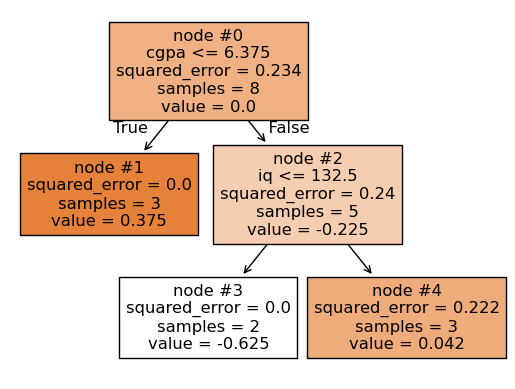

In [29]:
from sklearn.tree import plot_tree
plot_tree(reg1, feature_names=['cgpa', 'iq'], filled = True,node_ids=True)
plt.show()

In [32]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,prd1(log-Odd),prd1(prob),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [33]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()
  den = sum(temp_df['prd1(prob)'] * (1 - temp_df['prd1(prob)']))